### Stock Price Prediction Using Machine Learning and Deep Learning Algorithms
## Introduction
- Machine learning and deep learning excels in making predictions using past data it is fed, and what better data can we make predictions on other than the stock market! It is constantly updated with new data every day, and has plenty of prior data that our algorithms can learn from (depending on the stock of course). These algorithms can be useful to investors to help them get a better idea of the direction of a stock and whether or not to invest. They are not to be taken as financial advice since as you will see later on in the project, they are not pefectly accurate and there are many other factors which can deviate the market. With that being said, they still help investors to get some rough foresight on the future of a stock. We will use a machine learning and a deep learning algorithm called linear regression and long short-term memory recurrent neural network. They will then be compared on their performances in various fields such as root mean square error and mean absolute error.
- Root mean square error (or RMSE for short) is a formula used for calculating the average difference between a model's predicted values and actual values. This a good metric for evaluating our models since it can numerically show whether or not our predicted stock prices are close to the actual stock prices. RMSE can be any value from 0 to infinity, but the closer the RMSE to 0 the better the model is performing. Mean Absolute Error (or MAE) is very similar to RMSE where it measures the mean difference in predicted values and actual values, but it differs in the fact that it does not consider their direction.

## Data
- The data I will use for this demonstration will be taken from the yfinance python library (which takes data from yahoo finance). Specifically, I will be using the Tesla stock since it is a popular one most people know and are interested in. I will be using data starting from 2011 to 2020 and will have a csv to the data in the repository for viewing as well. We are interested in prediciting the close price in this project, and we will demonstrate what the tesla graph should look like.

In [1]:
#Installing necessary packages for predictions
%pip install --upgrade keras

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 14.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
Note: you may need to restart the kernel to use updated packages.


# Linear Regression Algorithm
## What is it?
- This supervised machine learning algorithm computes the linear relationship between a dependent and independent variable to by fitting a line that best represents the given data. There are multiple types of linear regression models which is differentiated by the amount of dependent or independent variables (or features) used to created the line. The first two types are simple and multiple linear regressors which are classified by the amount of independent variables used in the model. A simple linear regressor uses a single independent featurea and a multiple linear regressor uses more than one independent features. The last two types are univariate and multivariate linear regressors which are similar to simple and multiple regressors, but are classified by the number of dependent features used. A univariate regressor uses one dependent variable while a multivariate regressor uses more than one dependent features.

## Implementation

Root Mean Square Error:  0.8538992005029283
Mean Absolute Error:  0.606182446795067


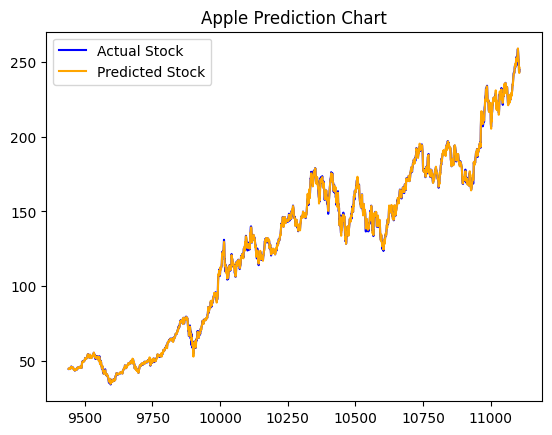

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import yfinance as yf

# Load the Data for Analysis (We'll use apple's stock for this example)
ticker = yf.Ticker("AAPL")
historical_data = ticker.history(period="Max")

# Convert to data for accessibility
data = pd.DataFrame(historical_data)
data.reset_index(inplace=True)

# Convert date to a datetime format
data['Date'] = pd.to_datetime(data.Date)

# Features and Labels
# We are using the open, high, low, and volume features to predict the closing price for each day
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data for training and testing the model
# Use 15% of the data for testing, and we do not want to shuffle or randomize the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False, random_state=None)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evalute the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print("Root Mean Square Error: ", rmse)
print("Mean Absolute Error: ", mae)

# Stock Graph of the Predicted Price vs Actual Price
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.plot(dfr.Actual, color='blue')
plt.plot(dfr.Predicted, color='orange')
plt.title("Apple Prediction Chart")
plt.legend(["Actual Stock", "Predicted Stock"])



## Analysis
- After implementing and executing the linear regression model we can see we got both RMSE and MAE under 1 which means this model is pretty accurate at predicting the closing price since the difference between the actual price and predicted price is low. We can also visualize how accurate it is with the graph shown above which shows the orange line (the predicted prices) almost perfectly following the blue line (the actual prices). The high accruracy, low RMSE, and low MAE scores can be attributed to the massive amount of data we are able to use to create the model. Since Apple has been around since around the 1980's, there is a plethora of data we can use to test and train our model, improving its performance.

# Long Short Term Memory Neural Network
## What is it?
- A Long Short Term Memory Model, also known as a LSTM for short, is a recurrent neural network which differs from a regular recurrent neural network because it introduces of a memory cell which makes it easier for the network to learn long term dependencies. This memory cell makes the model advanced in tasks such as language translation, speech recognition, and time series forecasting (like stock market prediction) which utilizes sequential data. This memory cell is controlled by three gates, the input gate, the forget gate, and the output gate which decide what is added, removed, and outputted from the cell. 

## Implementation

In [19]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


# Load the Data for Analysis (We'll use apple's stock for this example)
ticker = yf.Ticker("AAPL")
historical_data = ticker.history(period="15y")

# Convert to data for accessibility
df = pd.DataFrame(historical_data)
data = df.filter(['Close'])
dataset = data.values

# Get the number of rows to train the data on
# We'll being using 95% of the data to train on
train_data_len = int(np.ceil(len(dataset) * .95))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the scaled training data set
training_data = scaled_data[0:int(train_data_len), :]
X_train = []
y_train = []

# Split the data into X_train and y_train and convert them to numpy arrays
for i in range(60, len(training_data)):
    X_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM Model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)



c:\Users\dylgi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3526/3526 ━━━━━━━━━━━━━━━━━━━━ 54s 15ms/step - loss: 0.0014 - mean_absolute_error: 0.0208 - mean_squared_error: 0.0014


In [20]:
# Create the testing data set
testing_data = scaled_data[train_data_len - 60:, :]
X_test = []
y_test = dataset[train_data_len:, :]
for i in range(60, len(testing_data)):
    X_test.append(testing_data[i-60:i, 0])

X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the models predicted values
pred = model.predict(X_test)
pred = scaler.inverse_transform(pred)

#Calculate root mean square error
rmse = np.sqrt(np.mean(((pred - y_test) ** 2)))
rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


7.827154885271663

C:\Users\dylgi\AppData\Local\Temp\ipykernel_17428\851248927.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred


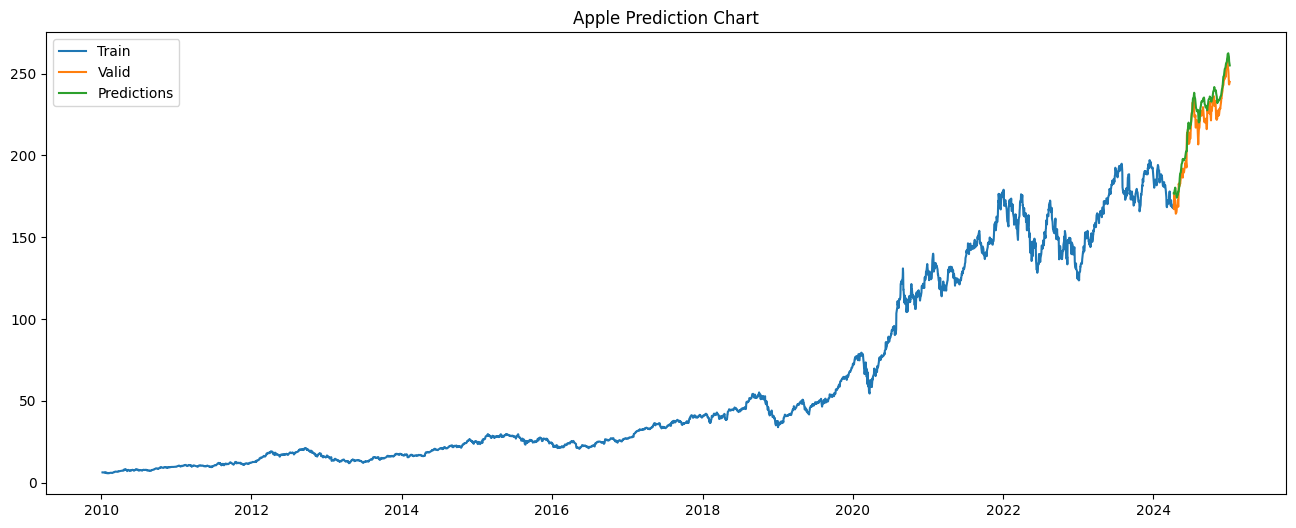

In [21]:
# Plot the data
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = pred

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Apple Prediction Chart')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')
plt.show()

## Analysis
- After implementation of the LSTM model using the adam optimizer we get a rmse of about 7.8 which is not very low, but is still decent for making predictions. We can see this difference in prediction and actual stock with our plot above. It seems our predictions in this model slightly over shoots the values of the actual stock which causes this higher rmse. Once again the surplus of data we are able to use for this model also helps with our prediction allowing the LSTM to have more data to train itself on. I limited the data to 2010 this time around though because it slowed our model down from computation and there was not much movement on the stock from 1980 to 2010 anyways.

## Conclusion
- After comparing our two models it seems our linear regression model is the better performer of the two, but that is not always the case. With more epochs and layers, the LSTM can certainly be more accurate than the one I have developed and more accurate than our linear regression model. Either way, both the machine learning and deep learning models are great candidates for stock price prediction, but are not 100 percent accurate all the time. Once again these should only serve as guidance for investors and not actually how the stock will go. There are plenty of other biases that can be taken into consideration such as quarterly end prices and recessions, which could improve the performance of these models if included. Both of these models can be used on any current stocks (with changes in periods depending on how long the model has been around), but will improve the older the stock is. 